# Lab: LMS Algorithm (15 pts)

To start with, please download the dataset.mat file from Canvas and load it into NumPy arraysa. There are two variables in the file: data 
$X \in \mathbb{R}^{100 \times 3}$ and target
$D \in \mathbb{R}^{100 \times 1}$. Each individual pair of data and target is composed into X and D following the same way as discussed in Lecture 2. Specifically, each row in X corresponds to the transpose of a data point, with the first element as constant 1 and the other two as the two input features $x_{1k}$ and $x_{2k}$. The goal of the learning task is finding the weight vector W ∈ R3×1 for the linear model that can minimize the MSE loss, which is also formulated on Lecture 2.


(a) (3pt) Directly compute the least square (Wiener) solution with the provided dataset. What is the optimal weight W∗? What is the MSE loss of the whole dataset when the weight is set to W∗?

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


In [2]:
data = scipy.io.loadmat('dataset.mat')
D = data["D"]
X = data["X"]

– Least square (Wiener) solution for linear model
$$
W^* = (X^T X)^{-1} X^T D
$$

In [3]:
w_star = np.linalg.inv(X.T @X)@X.T@D
print(w_star)

[[ 1.0006781 ]
 [ 1.00061145]
 [-2.00031968]]


In [4]:
N = X.shape[0]  
mse = (1 / (2 * N)) * np.sum((D - X @ w_star) ** 2)

print(f"MSE: {mse:.8f}")

MSE: 0.00005040



(b) (4pt) Now consider that you can only train with 1 pair of data points and target each time. In such a case, the LMS algorithm should be used to find the optimal weight. Please initialize the weight vector as W 0 = [0.53, 0.20, 0.10]T , and update the weight with the LMS algorithm. After each epoch (every time you go through all the training data and loop back to the beginning), compute and record the MSE loss of the current weight on the whole dataset. Run LMS for 20 epochs with learning rate r = 0.005, report the weight you get in the end, and plot the MSE loss in log scale vs. Epochs.

In [5]:
W = np.array([[0.53, 0.20, 0.10]]).T
r = 0.005
epochs = 20
mse_list = []

for epoch in range(epochs):
    for k in range(N):
        x_k = X[k].reshape(3,1)
        d_k = D[k].item()
        s_k = (W.T @ x_k).item()
        W = W + r * x_k * (d_k - s_k)

    mse = (1 / (2 * N)) * np.sum((D - X @ W) ** 2)  
    mse_list.append(mse)


In [6]:
print("Final Weight Vector:\n", W)

Final Weight Vector:
 [[ 1.00070598]
 [ 1.00059491]
 [-2.00033694]]


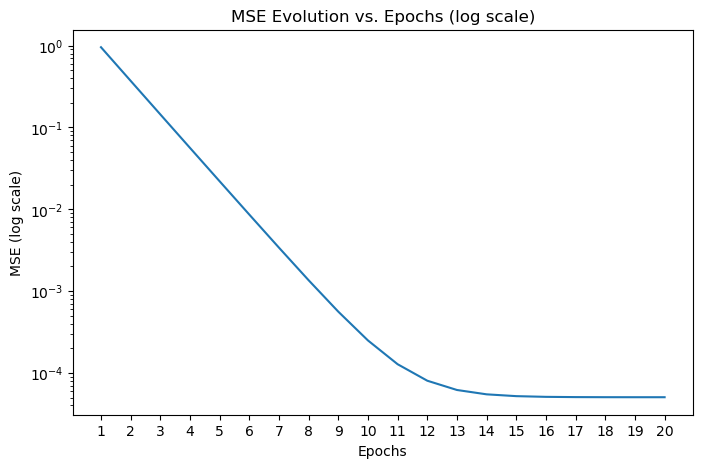

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), mse_list)
plt.xlabel("Epochs")
plt.ylabel("MSE (log scale)")
plt.yscale("log")
plt.xticks(range(1, epochs + 1))
plt.title("MSE Evolution vs. Epochs (log scale)")
plt.show()

(c) (3pt) Scatter plot the points $(x_{1k}, x_{2k}, d_k)$ for all 100 data-target pairs in a 3D figureb, and plot the lines corresponding to the linear models you got in (a) and (b) respectively in the same figure. Observe if the linear models fit the data well.

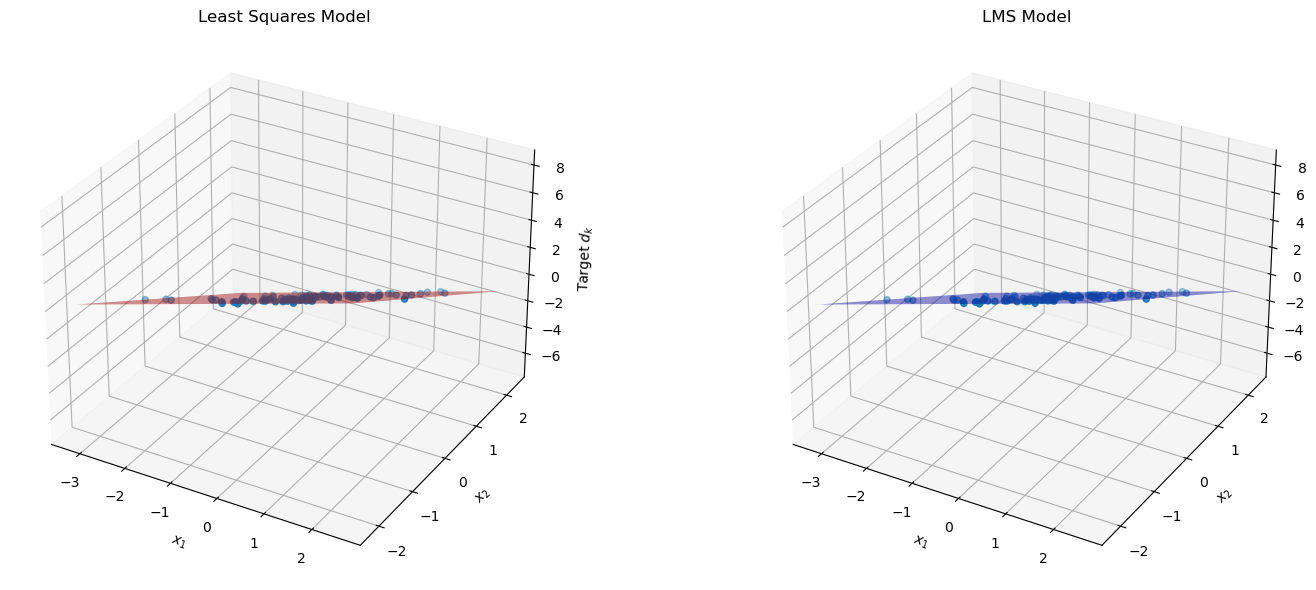

In [8]:
W_lms = W

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(projection='3d'))

scatter1 = ax1.scatter(X[:, 1], X[:, 2], D)
x1_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 20)
x2_range = np.linspace(X[:, 2].min(), X[:, 2].max(), 20)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
Z_ls = w_star[0] + w_star[1]*x1_mesh + w_star[2]*x2_mesh
ax1.plot_surface(x1_mesh, x2_mesh, Z_ls, alpha=0.5, color='red')
ax1.set_title('Least Squares Model')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('Target $d_k$')

scatter2 = ax2.scatter(X[:, 1], X[:, 2], D)
Z_lms = W_lms[0] + W_lms[1]*x1_mesh + W_lms[2]*x2_mesh
ax2.plot_surface(x1_mesh, x2_mesh, Z_lms, alpha=0.5, color='blue')
ax2.set_title('LMS Model')
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_zlabel('Target $d_k$')

plt.tight_layout()
plt.show()

(d) (5pt) Learning rate r is an important hyperparameter for the LMS algorithm, as well as for CNN optimization. Here, try repeat the process in (b) with r set to 0.01, 0.05, 0.1 and 0.5 respectively. Together with the result you got in (b), plot the MSE losses of all sets of experiments in log scale vs. Epochs in one figure. Then try further enlarge the learning rate to r = 1 and observe how the MSE changes. Based on these observations, comments on how the learning rate affects the speed and quality of the learning process. (Note: The learning rate tuning for the CNN optimization will be introduced in Lecture 7.)

In [9]:
learning_rates = [0.005, 0.01, 0.05, 0.1, 0.5]
epochs = 20
mse_results = {}

for r in learning_rates:
    W = np.array([[0.53, 0.20, 0.10]]).T  
    mse_list = []

    for epoch in range(epochs):
        for k in range(N):
            x_k = X[k].reshape(3, 1)
            d_k = D[k].item()
            s_k = (W.T @ x_k).item()
            W = W + r * x_k * (d_k - s_k)  

        mse = (1 / (2 * N)) * np.sum((D - X @ W) ** 2)  
        mse_list.append(mse)

    mse_results[r] = mse_list  

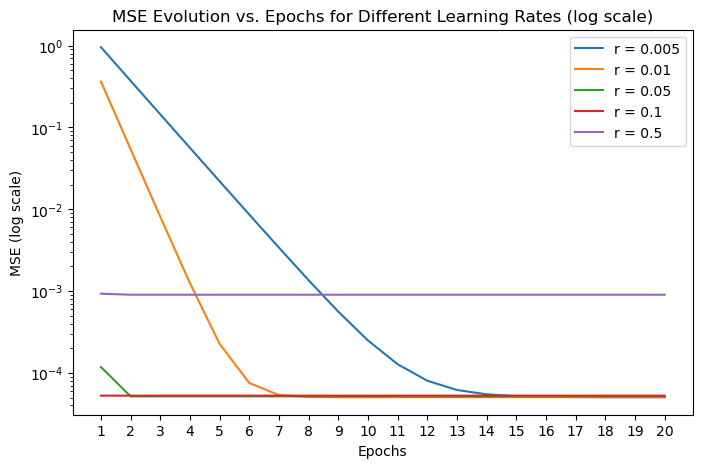

In [10]:
plt.figure(figsize=(8, 5))

for r, mse_list in mse_results.items():
    plt.plot(range(1, epochs + 1), mse_list, label=f"r = {r}")

plt.xlabel("Epochs")
plt.ylabel("MSE (log scale)")
plt.yscale("log")
plt.xticks(range(1, epochs + 1))
plt.legend()
plt.title("MSE Evolution vs. Epochs for Different Learning Rates (log scale)")
plt.show()


What happen with r = 1? 

In [11]:
W = np.array([[0.53, 0.20, 0.10]]).T
r = 1
epochs = 20
mse_list_1 = []

for epoch in range(epochs):
    for k in range(N):
        x_k = X[k].reshape(3,1)
        d_k = D[k].item()
        s_k = (W.T @ x_k).item()
        W = W + r * x_k * (d_k - s_k)

    mse = (1 / (2 * N)) * np.sum((D - X @ W) ** 2)  
    print(f"Epoch {epoch + 1}: MSE = {mse:.8f}") 
    mse_list_1.append(mse)


Epoch 1: MSE = 14657955294674538496.00000000
Epoch 2: MSE = 95125471798345421701343347522297397248.00000000
Epoch 3: MSE = 617333851573464326395881132062563291706847785467353497600.00000000
Epoch 4: MSE = 4006299018483404861468350290402957997992004303307139492686149055651166289920.00000000
Epoch 5: MSE = 25999597761554208772528314821441009442417894217940068638784180470040561281149774682781487464448.00000000
Epoch 6: MSE = 168729064067341401726893943393463130785345521857929527540718752605903368933443456885357009498854087304157046243328.00000000
Epoch 7: MSE = 1094997596583554668416728292539241433489542013911546194297366241067765194103315086608348571237978988097223993957853875589402526220288.00000000
Epoch 8: MSE = 7106183769532643171166853241266150338400543572084131551169082506871011377715331831587867481320400330444427559032106028793890272112439299422067403784192.00000000
Epoch 9: MSE = 46116857172950509200139274913124369642802821420863402482363913517143292945928235191016938953947943490

/var/folders/9m/ym86jvl93wq3tx6ssy8ql7kh0000gn/T/ipykernel_1299/2768407857.py:13: RuntimeWarning: overflow encountered in square
  mse = (1 / (2 * N)) * np.sum((D - X @ W) ** 2)
